### KNN 회귀 (Regression)
- 생선의 길이를 사용하여 무게를 예측

In [3]:
import numpy as np

fish_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
fish_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

### 길이와 무게를 산포도로 표현

In [1]:
import matplotlib.pyplot as plt

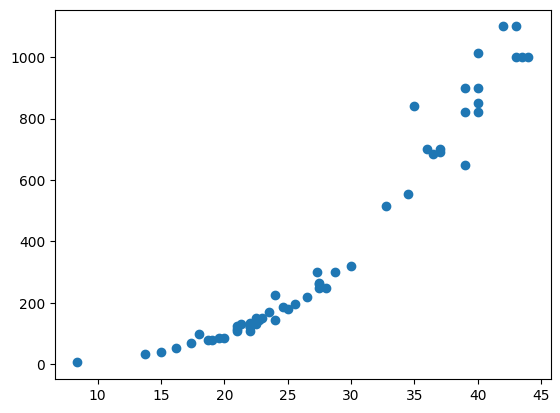

In [5]:
plt.scatter(
    x=fish_length,
    y=fish_weight
)

plt.show()

### Train 과 Test 분리

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
x_train , x_test, y_train, y_test = \
    train_test_split(fish_length,fish_weight,random_state=42)

In [13]:
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(42,) (14,)
(42,) (14,)


In [14]:
# scikit-learn 사용하기 위해서는 1열로 구성된 배열로 재구성 해야 된다. 
x_train=x_train.reshape(-1,1)
x_test=x_test.reshape(-1,1)
y_train=y_train.reshape(-1,1)
y_test=y_test.reshape(-1,1)

### 회귀모델 사용

In [8]:
from sklearn.neighbors import KNeighborsRegressor

In [16]:
reg = KNeighborsRegressor()
reg.fit(x_train,y_train)
reg.score(x_test,y_test)

0.992809406101064

### 회귀모델은 예측률을 어떻게 메길까??
- 평균 절대값 오차 : 결정계수(R^2) <br><br>
    - 작을 수록 좋다. 왜냐 오차는 작을 수록 좋으니까 <br><br>
    - 나온 값이 target에서 +- 오차 정도 난다는 말이다. 
$$R^2 = 1 - \frac {\Sigma(타깃 - 예측)^2} {\Sigma(타깃 - 평균)^2}$$

In [17]:
# 평균 절대값 오차 구하는 방법
from sklearn.metrics import mean_absolute_error

In [18]:
test_prediction = reg.predict(x_test)
mae = mean_absolute_error(y_test,test_prediction)
mae

19.157142857142862

### 과대적합과 과소적합

In [19]:
# train
reg.score(x_train,y_train)

0.9698823289099254

In [20]:
# test
reg.score(x_test,y_test)

0.992809406101064

- train보다 test의 점수가 잘 나왔으므로 과소적합이 발생했다. <br><br>
- 보통은 train 점수가 test의 점수보다 조금 더 잘 나온 과대적합을 기준으로 삼는다. <br><br>
- 하이퍼 파라미터를 조절해서 해결할 수 있다.

In [28]:
reg.n_neighbors = 3
reg.fit(x_train,y_train)
print(reg.score(x_train,y_train))
print(reg.score(x_test,y_test))

0.9804899950518966
0.9746459963987609


- KNN의 경우 이웃의 갯수를 줄이면 과대적합하게 되고, 이웃의 갯수를 늘리면 과소적합하게 된다. 

### 이웃의 갯수 조절로 확인

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


K ====> 1
train score :  0.9852830341215901
test score :  0.991309195814175
--------------------


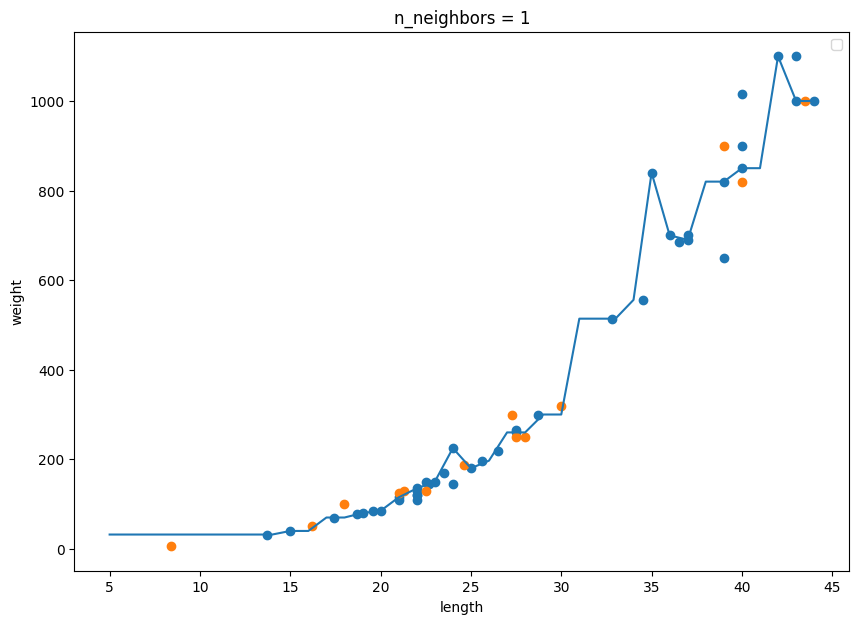

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


K ====> 3
train score :  0.9804899950518966
test score :  0.9746459963987609
--------------------


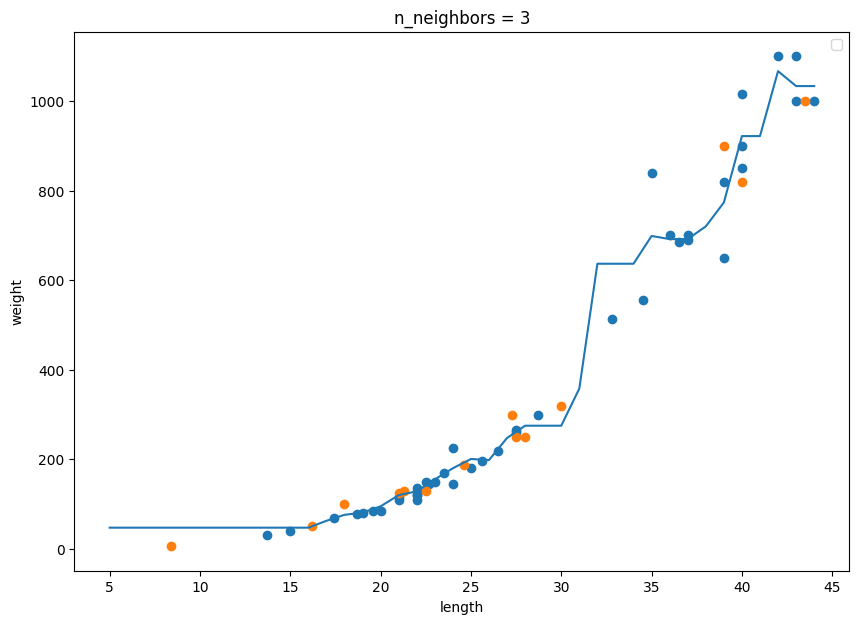

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


K ====> 5
train score :  0.9698823289099254
test score :  0.992809406101064
--------------------


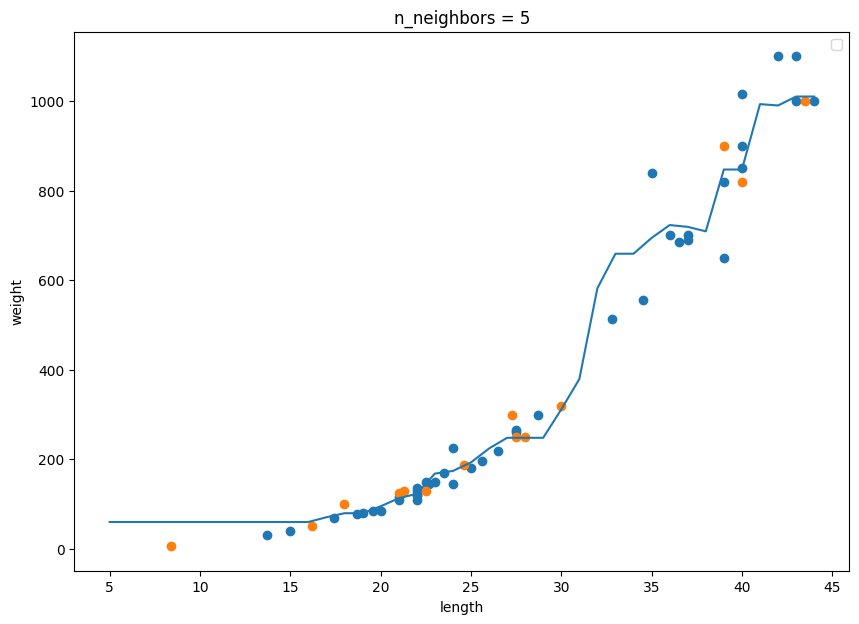

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


K ====> 10
train score :  0.96164569026043
test score :  0.9737908255822255
--------------------


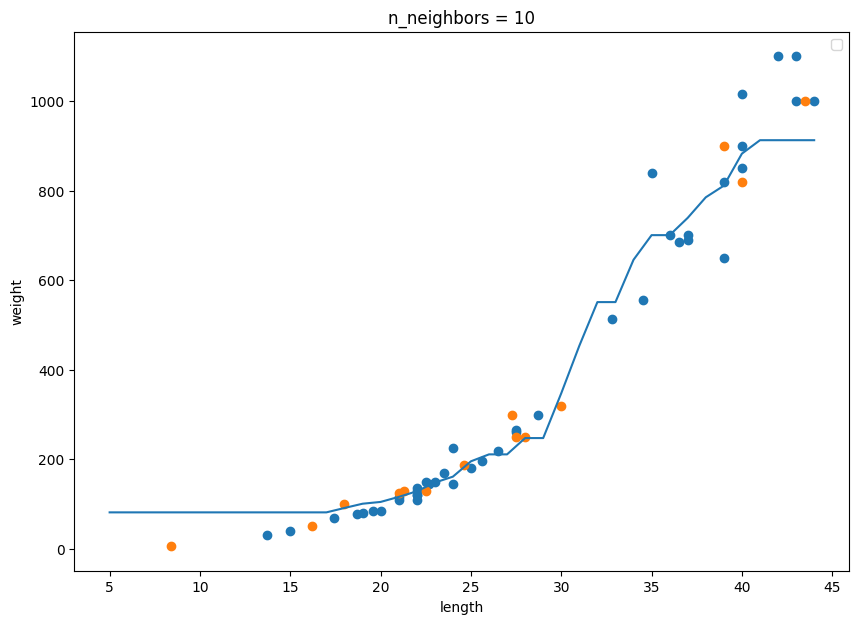

In [32]:
reg = KNeighborsRegressor()

# x좌표 만들기
x = np.arange(5,45).reshape(-1,1)

for n in [1,3,5,10]:
    reg.n_neighbors = n
    reg.fit(x_train,y_train)
    print('K ====>',n)
    print('train score : ',reg.score(x_train,y_train))
    print('test score : ',reg.score(x_test,y_test))
    print('-'*20)

    # 지정한 범위 x에 대한 예측 구하기
    prediction = reg.predict(x)

    # 훈련 세트와 검증세트의 예측 결과 그래프 그리기
    plt.figure(figsize=(10,7))

    plt.scatter(x_train,y_train)
    plt.scatter(x_test,y_test)
    plt.plot(x,prediction)
    plt.title(f'n_neighbors = {n}')
    plt.xlabel('length')
    plt.ylabel('weight')
    plt.legend()

    plt.show()